In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


In [9]:
#Load preprocessed data
train_df = pd.read_csv('preprocessed_train.csv')
test_df = pd.read_csv('preprocessed_test.csv')

# Display the first few rows of the train dataset
print("Preprocessed Train Data:")
print(train_df.head())


Preprocessed Train Data:
   Store  DayOfWeek        Date     Sales  Customers      Open     Promo  \
0      1   0.501484  2015-07-31 -0.132683  -0.168269  0.452399  1.273237   
1      2   0.501484  2015-07-31  0.075373  -0.017540  0.452399  1.273237   
2      3   0.501484  2015-07-31  0.659800   0.404499  0.452399  1.273237   
3      4   0.501484  2015-07-31  2.135414   1.862258  0.452399  1.273237   
4      5   0.501484  2015-07-31 -0.247231  -0.159656  0.452399  1.273237   

  StateHoliday  SchoolHoliday   Weekday  Weekend  Day_of_Month     Month  \
0            0       2.144211  0.501484    False      1.740766  0.346724   
1            0       2.144211  0.501484    False      1.740766  0.346724   
2            0       2.144211  0.501484    False      1.740766  0.346724   
3            0       2.144211  0.501484    False      1.740766  0.346724   
4            0       2.144211  0.501484    False      1.740766  0.346724   

       Year  Is_Beginning_Month  Is_Mid_Month  Is_End_Month  

/home/enat/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3577: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/enat/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3577: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [10]:
# Extract features from the Date column
def extract_date_features(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Weekday'] = df['Date'].dt.weekday
    df['Day_of_Month'] = df['Date'].dt.day
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year
    return df

train_df = extract_date_features(train_df)
test_df = extract_date_features(test_df)

# Display the extracted features
print("Train Data with Date Features:")
print(train_df.head())


Train Data with Date Features:
   Store  DayOfWeek       Date     Sales  Customers      Open     Promo  \
0      1   0.501484 2015-07-31 -0.132683  -0.168269  0.452399  1.273237   
1      2   0.501484 2015-07-31  0.075373  -0.017540  0.452399  1.273237   
2      3   0.501484 2015-07-31  0.659800   0.404499  0.452399  1.273237   
3      4   0.501484 2015-07-31  2.135414   1.862258  0.452399  1.273237   
4      5   0.501484 2015-07-31 -0.247231  -0.159656  0.452399  1.273237   

  StateHoliday  SchoolHoliday  Weekday  Weekend  Day_of_Month  Month  Year  \
0            0       2.144211        4    False            31      7  2015   
1            0       2.144211        4    False            31      7  2015   
2            0       2.144211        4    False            31      7  2015   
3            0       2.144211        4    False            31      7  2015   
4            0       2.144211        4    False            31      7  2015   

   Is_Beginning_Month  Is_Mid_Month  Is_End_Month

In [11]:
# Handle non-numeric or invalid values
def clean_data(df):
    # Convert non-numeric columns to numeric where applicable
    df = df.apply(pd.to_numeric, errors='coerce')
    
    # Fill or drop NaN values created by coercion
    df.fillna(df.median(), inplace=True)
    
    return df

train_df = clean_data(train_df)
test_df = clean_data(test_df)

# Display the cleaned data
print("Cleaned Train Data:")
print(train_df.head())
print("Cleaned Test Data:")
print(test_df.head())


Cleaned Train Data:
   Store  DayOfWeek                 Date     Sales  Customers      Open  \
0      1   0.501484  1438300800000000000 -0.132683  -0.168269  0.452399   
1      2   0.501484  1438300800000000000  0.075373  -0.017540  0.452399   
2      3   0.501484  1438300800000000000  0.659800   0.404499  0.452399   
3      4   0.501484  1438300800000000000  2.135414   1.862258  0.452399   
4      5   0.501484  1438300800000000000 -0.247231  -0.159656  0.452399   

      Promo  StateHoliday  SchoolHoliday  Weekday  Weekend  Day_of_Month  \
0  1.273237           0.0       2.144211        4    False            31   
1  1.273237           0.0       2.144211        4    False            31   
2  1.273237           0.0       2.144211        4    False            31   
3  1.273237           0.0       2.144211        4    False            31   
4  1.273237           0.0       2.144211        4    False            31   

   Month  Year  Is_Beginning_Month  Is_Mid_Month  Is_End_Month  
0      

In [12]:
# Split the data into features and target
# Dropping 'Date' column but keeping extracted features
X = train_df.drop(['Sales', 'Date'], axis=1)
y = train_df['Sales']

# Ensure the training data has the same columns as the test data
common_columns = list(set(X.columns).intersection(set(test_df.columns)))
X = X[common_columns]

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training and validation sets created.")



Training and validation sets created.


In [13]:
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling the features
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))  # Random Forest Regressor model
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

print("Model training completed.")


Model training completed.


In [14]:
# Predict and evaluate the model
y_pred_train = pipeline.predict(X_train)
y_pred_valid = pipeline.predict(X_valid)

# Calculate Mean Squared Error
mse_train = mean_squared_error(y_train, y_pred_train)
mse_valid = mean_squared_error(y_valid, y_pred_valid)

print(f"Training MSE: {mse_train}")
print(f"Validation MSE: {mse_valid}")


Training MSE: 0.02152128262905951
Validation MSE: 0.15552892623015085


In [15]:
# Make predictions on the test data
# Dropping 'Date' column but keeping extracted features
X_test = test_df.drop(['Id', 'Date'], axis=1)
X_test = X_test[common_columns]  # Ensure the test data has the same columns as the training data

y_test_pred = pipeline.predict(X_test)

# Create a DataFrame for submission
submission = pd.DataFrame({'Id': test_df['Id'], 'Sales': y_test_pred})

# Save the submission DataFrame to a CSV file
submission.to_csv('submission.csv', index=False)

print("Predictions saved to submission.csv.")



Predictions saved to submission.csv.


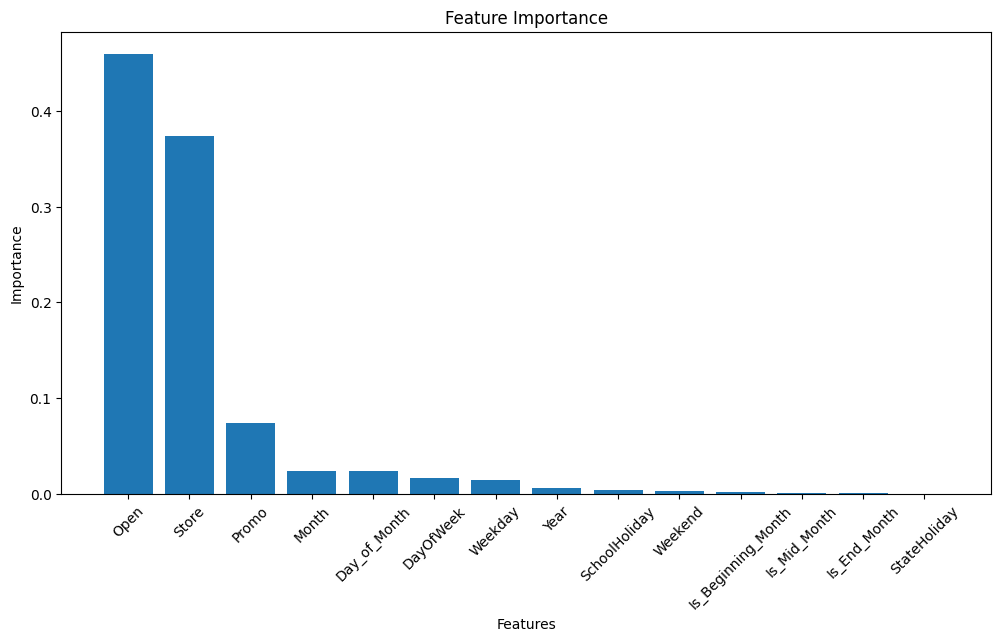

In [16]:
#Post prediction analysis
import matplotlib.pyplot as plt

# Get feature importance from the model
feature_importances = pipeline.named_steps['model'].feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()


In [2]:
import numpy as np

# Simplified function to calculate bootstrap samples
def bootstrap_predictions(pipeline, X, n_bootstrap=50, sample_size=50):
    preds = []
    for i in range(n_bootstrap):
        sample_indices = np.random.choice(range(X.shape[0]), sample_size, replace=True)
        X_sample = X.iloc[sample_indices]
        preds.append(pipeline.predict(X_sample))
    return np.array(preds)

# Using fewer bootstrap samples and a smaller sample size
bootstrap_preds = bootstrap_predictions(pipeline, X_valid, n_bootstrap=50, sample_size=50)

# Calculate confidence intervals
ci_lower = np.percentile(bootstrap_preds, 2.5, axis=0)
ci_upper = np.percentile(bootstrap_preds, 97.5, axis=0)

# Print confidence intervals
print(f'95% Confidence Interval for the predictions: \nLower Bound: {ci_lower}\nUpper Bound: {ci_upper}')


NameError: name 'pipeline' is not defined

In [ ]:
import joblib
import datetime

# Get the current timestamp
timestamp = datetime.datetime.now().strftime('%d-%m-%Y-%H-%M-%S-%f')

# Save the model
model_filename = f'model_{timestamp}.pkl'
joblib.dump(pipeline, model_filename)

print(f"Model saved as {model_filename}")
